# 3# Cluster analysis of Customers for a Supermarket.
The purpose of this analysis is to segment into homogeneous clusters a data frame containing more than 2000 customers with the final goal of extracting useful insights that could help both the marketing and the business intelligence dept to make successful customized promotions for each segment.

In [135]:
import pandas as pd
import numpy as np
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [136]:
path=r"C:\Users\Utente\Desktop\Various Datasets\Cluster an\marketing_campaign.csv"

In [137]:
df=pd.read_csv(path,sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# Data cleaning
Data cleaning is important because it improves the quality and integrity of data, ensuring accurate and reliable analysis, which is essential for informed decision-making and efficient data processing.

In [138]:
df=df.drop(['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','Z_CostContact','Z_Revenue'],axis=1)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Filling null income values This code calculates the median of the 'Income' column in the DataFrame 'df' and then replaces any missing values in the same column with this median value.

In [140]:
median_inc=df['Income'].median()
df['Income']=df['Income'].fillna(median_inc)

In [141]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Complain               0
dtype: int64

# Feature engineering
Feature engineering is important because it transforms raw data into meaningful features that significantly enhance the performance of machine learning models by providing them with relevant and insightful inputs.

This code calculates the age of individuals from their birth year, removes the original 'Year_Birth' column from the DataFrame 'df', and then generates descriptive statistics for the columns 'Age', 'Kidhome', 'Teenhome', and 'Income'.

In [142]:
current_year = 2023
df['Age'] = df['Year_Birth'].apply(lambda birth_year: current_year - birth_year)
df.drop('Year_Birth',axis=1)
df['Age']

0       66
1       69
2       58
3       39
4       42
        ..
2235    56
2236    77
2237    42
2238    67
2239    69
Name: Age, Length: 2240, dtype: int64

In [143]:
quant=df[['Age','Kidhome','Teenhome','Income']]
quant.describe()

,Age,Kidhome,Teenhome,Income
count,2240.000000,2240.000000,2240.000000,2240.000000
mean,54.194196,0.444196,0.506250,52237.975446
std,11.984069,0.538398,0.544538,25037.955891
min,27.000000,0.000000,0.000000,1730.000000
25%,46.000000,0.000000,0.000000,35538.750000
50%,53.000000,0.000000,0.000000,51381.500000
75%,64.000000,1.000000,1.000000,68289.750000
max,130.000000,2.000000,2.000000,666666.000000


# Encoding
Encoding is important because it converts categorical data into numerical format, making it usable for machine learning algorithms that require numerical input.

This code uses a label encoder to convert the categorical values in the 'Education' and 'Marital_Status' columns of the DataFrame 'df' into numerical values, and then prints the mappings of the original labels to their encoded numerical values for both columns.

In [144]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

df['Education1']=lb.fit_transform(df['Education'])
df['Marital_Status1']=lb.fit_transform(df['Marital_Status'])

label_mapping = dict(zip(df['Education'], df['Education1']))
print("Legend - Encoded Values:")
for label, encoded_value in label_mapping.items():
    print(f"{label}: {encoded_value}")


Legend - Encoded Values:
Graduation: 2
PhD: 4
Master: 3
Basic: 1
2n Cycle: 0


In [145]:
label_mapping1 = dict(zip(df['Marital_Status'], df['Marital_Status1']))
print("Legend - Encoded Values:")
for label1, encoded_value1 in label_mapping1.items():
    print(f"{label1}: {encoded_value1}")

Legend - Encoded Values:
Single: 4
Together: 5
Married: 3
Divorced: 2
Widow: 6
Alone: 1
Absurd: 0
YOLO: 7


# Visualization of the data frame characteristics:
Plotting the distribution of values in the 'Age' column of the DataFrame 'df', with the bars of the histogram spaced closely together by setting the gap between them to 0.1.

In [146]:
fig1=px.histogram(df,x='Age')
fig1.update_layout(bargap=0.1)
fig1.show()

Removing rows from the DataFrame where the value in the 'Income' column exceeds 500,000, effectively filtering out outliers with unusually high income values.

In [147]:
#Dropping the outlier
mask = df['Income'] <= 500000
df = df[mask]


In [1]:
# # df = px.data.tips()
# fig2=px.box(df, x='Education1',y= 'Income')

# fig2.show()

In [149]:
X=df.drop(['ID','Year_Birth','Dt_Customer','Education','Marital_Status'],axis=1)


Correlation analysis by selecting numerical columns from the DataFrame 'X', calculating their correlation matrix, and then visualizing this matrix as a heatmap using Seaborn, with annotations displaying the correlation values and a Red-Blue color map, 

<Axes: >

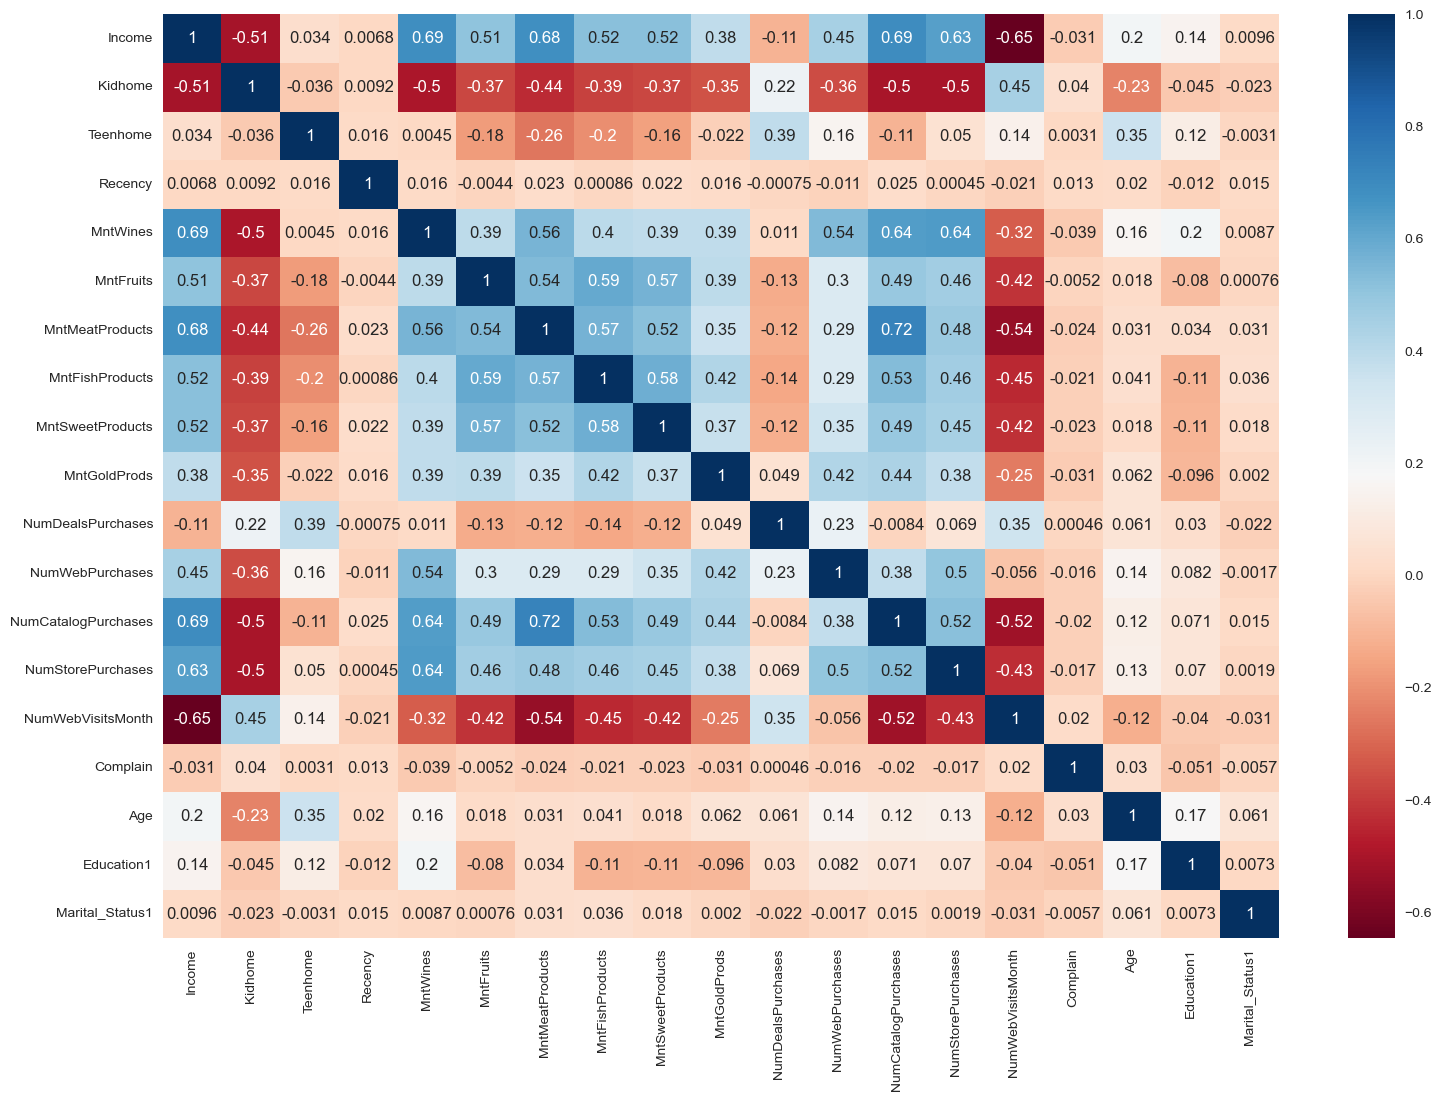

In [150]:
#correlation analysis
quant = X.select_dtypes(exclude='object')
corr=quant.corr()
plt.figure(figsize=(18,12))
sns.heatmap(corr,annot=True, cmap='RdBu')

In [151]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2239.0,51963.554712,21410.672116,1730.0,35533.5,51381.5,68277.5,162397.0
Kidhome,2239.0,0.443948,0.538390,0.0,0.0,0.0,1.0,2.0
Teenhome,2239.0,0.506476,0.544555,0.0,0.0,0.0,1.0,2.0
Recency,2239.0,49.121036,28.963662,0.0,24.0,49.0,74.0,99.0
MntWines,2239.0,304.067441,336.614830,0.0,24.0,174.0,504.5,1493.0
MntFruits,2239.0,26.307727,39.781468,0.0,1.0,8.0,33.0,199.0
MntMeatProducts,2239.0,167.016525,225.743829,0.0,16.0,67.0,232.0,1725.0
MntFishProducts,2239.0,37.538633,54.637617,0.0,3.0,12.0,50.0,259.0
MntSweetProducts,2239.0,27.074587,41.286043,0.0,1.0,8.0,33.0,263.0
MntGoldProds,2239.0,44.036177,52.174700,0.0,9.0,24.0,56.0,362.0


# Rescaling features
Rescaling features standardizes data to a common scale, improving the performance and accuracy of machine learning algorithms, especially those sensitive to the scale of input variables.

This code uses the StandardScaler to fit and transform the features in the DataFrame 'X', creating a new DataFrame 'XX' with the scaled data, and then displays the descriptive statistics transposed (rows as columns and vice versa) for 'XX'.

In [152]:
scaler=StandardScaler()
scaler.fit(X)
XX=pd.DataFrame(scaler.transform(X),columns=X.columns)
XX.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2239.0,-6.505639e-17,1.000223,-2.346716,-0.767548,-0.027191,0.762124,5.159021
Kidhome,2239.0,-1.745415e-17,1.000223,-0.824769,-0.824769,-0.824769,1.033035,2.890839
Teenhome,2239.0,-1.586741e-17,1.000223,-0.930282,-0.930282,-0.930282,0.906491,2.743264
Recency,2239.0,3.411494e-17,1.000223,-1.696333,-0.867523,-0.004180,0.859163,1.722507
MntWines,2239.0,-4.125527e-17,1.000223,-0.903511,-0.832197,-0.386485,0.595569,3.532816
MntFruits,2239.0,-4.601550e-17,1.000223,-0.661454,-0.636311,-0.460310,0.168263,4.341993
MntMeatProducts,2239.0,2.221438e-17,1.000223,-0.740015,-0.669122,-0.443152,0.287928,6.903097
MntFishProducts,2239.0,3.332157e-17,1.000223,-0.687201,-0.632281,-0.467523,0.228124,4.054182
MntSweetProducts,2239.0,-5.712269e-17,1.000223,-0.655927,-0.631700,-0.462114,0.143553,5.715687
MntGoldProds,2239.0,-5.236246e-17,1.000223,-0.844203,-0.671667,-0.384107,0.229354,6.095576


# Dimensional Reduction

In [153]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(XX)
PCA_XX = pd.DataFrame(pca.transform(XX), columns=(["col1","col2", "col3"]))
PCA_XX.describe().T


,count,mean,std,min,25%,50%,75%,max
col1,2239.0,1.904090e-17,2.499453,-5.251277,-2.310685,-0.583626,2.177532,6.614783
col2,2239.0,2.221438e-17,1.418089,-3.776907,-1.137943,-0.141444,1.034549,4.854554
col3,2239.0,1.586741e-17,1.166274,-4.381198,-0.795750,0.000392,0.675977,5.298171


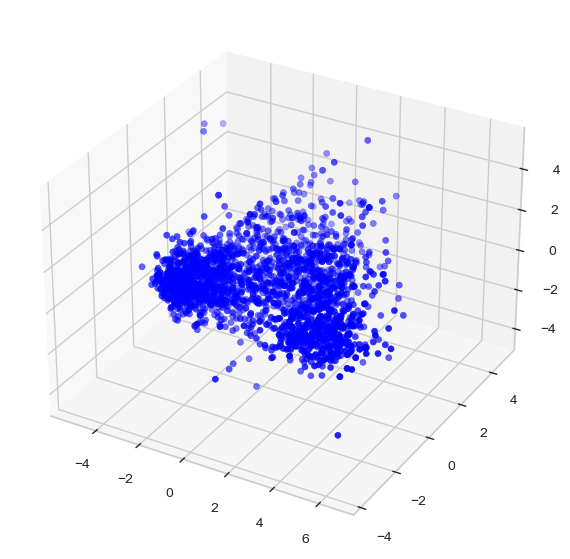

In [154]:
x =PCA_XX["col1"]
y =PCA_XX["col2"]
z =PCA_XX["col3"]
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="blue", marker="o" )
plt.show()

In [155]:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance:", explained_variance)
cumulative_explained_variance = explained_variance.cumsum()
print("Cumulative Explained Variance:", cumulative_explained_variance)


Explained Variance: [0.32865658 0.10579358 0.07155684]
Cumulative Explained Variance: [0.32865658 0.43445015 0.50600699]


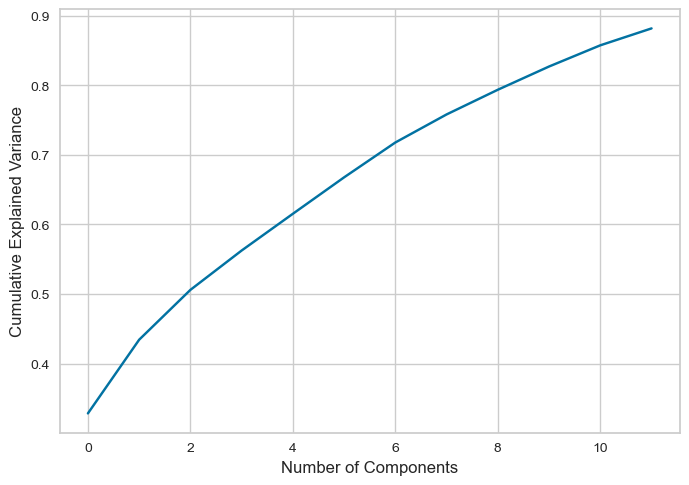

Cumulative Explained Variance: [0.32865658 0.43445017 0.50600762 0.56251672 0.61529751 0.66763223
 0.71767517 0.75796285 0.79340722 0.82678065 0.85720615 0.88150298]


In [156]:
pca = PCA(n_components=12)
pca.fit(XX)
PCA_XX = pd.DataFrame(pca.transform(XX), columns=(["col1","col2", "col3","col4", "col5","col6","col7", "col8", "col9","col10","col11", "col12"]))
PCA_XX.describe().T

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)


plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance2 = explained_variance.cumsum()
print("Cumulative Explained Variance:", cumulative_explained_variance2)

# Cluster analysis


Elbow method to determine number of clusters to be made:


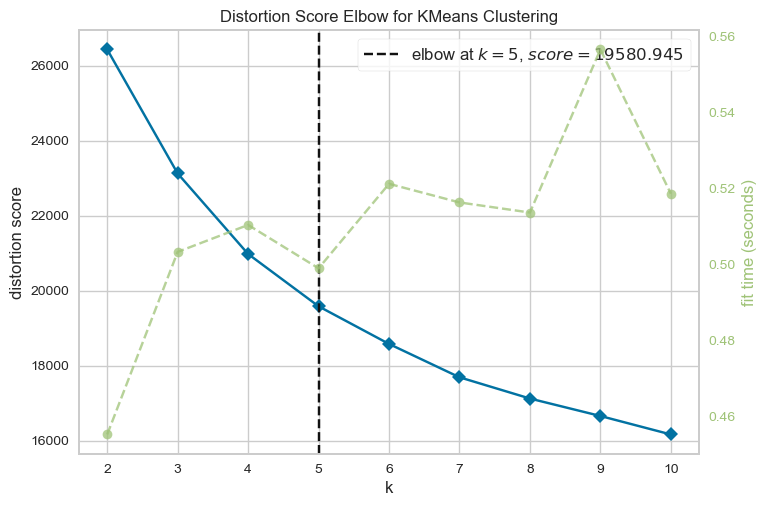

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [157]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans=KMeans(random_state=2)
print('Elbow method to determine number of clusters to be made:')
elbow=KElbowVisualizer(kmeans,k=10)
elbow.fit(PCA_XX)
elbow.show()


There are not substantial differences among the different algorithms used.

# Modelling
I'm now going to create the models, beginning with one that is gonna use the PCA Reduced and scaled dataframe and another that is gonna use the initial datframe without rescaling.

In [158]:
best_model=KMeans(random_state=2,n_clusters=5,algorithm='lloyd',n_init=20)
best_model1=KMeans(random_state=2,n_clusters=5,algorithm='lloyd',n_init=20)
best_model.fit(PCA_XX)
best_model1.fit(X)

KMeans(n_clusters=5, n_init=20, random_state=2)

In [159]:
cluster_labels = best_model.labels_
cluster_centers = best_model.cluster_centers_

cluster_labels1 = best_model1.labels_
cluster_centers1 = best_model1.cluster_centers_


cluster_centers = pd.DataFrame(best_model.cluster_centers_, columns=PCA_XX.columns[:])
cluster_centers1 = pd.DataFrame(best_model1.cluster_centers_, columns=X.columns[:])

# Agglomerative clustering
The last model that I'm gonna create basically exploit a function that progressively merges the similar individual until it reaches the desired numbers of clusters.

In [160]:
from sklearn.cluster import AgglomerativeClustering
AC=AgglomerativeClustering(n_clusters=5)
Clusters_ac=AC.fit_predict(PCA_XX)
#df["Clusters_Aggl"] = Clusters_ac

In [161]:
df['Cluster']=cluster_labels
df['Cluster_WS']=cluster_labels1

# Models Evaluation:

# Silhouette Score 
The silhouette score measures how well-separated the clusters are. It ranges from -1 to 1, where higher values indicate better-defined clusters.

In [162]:
from sklearn.metrics import davies_bouldin_score
sil=silhouette_score(PCA_XX,cluster_labels)
sil1=silhouette_score(X,cluster_labels1)
sil_ac=silhouette_score(PCA_XX,Clusters_ac)
print((f'Silhouette PCA Score: {sil:.2f} | Silhouette without scaling Score: {sil1:.2f} | Silhouette  AC Score: {sil_ac:.2f}'))

Silhouette PCA Score: 0.16 | Silhouette without scaling Score: 0.54 | Silhouette  AC Score: 0.14


# Davies-Bouldin Index
This index measures the average similarity between each cluster and its most similar cluster. Lower values are better, with 0 being the best score.

In [163]:
db=davies_bouldin_score(PCA_XX,cluster_labels)
db1=davies_bouldin_score(X,cluster_labels1)
db_ac=davies_bouldin_score(PCA_XX,Clusters_ac)
print((f'Davies-Bouldin PCA Index , {db:.2f} |Davies-Bouldin WS Index: {db1:.2f} | Davies-Bouldin AC Index: {db_ac:.2f} '))

Davies-Bouldin PCA Index , 1.63 |Davies-Bouldin WS Index: 0.46 | Davies-Bouldin AC Index: 1.72 


# Segment Analysis

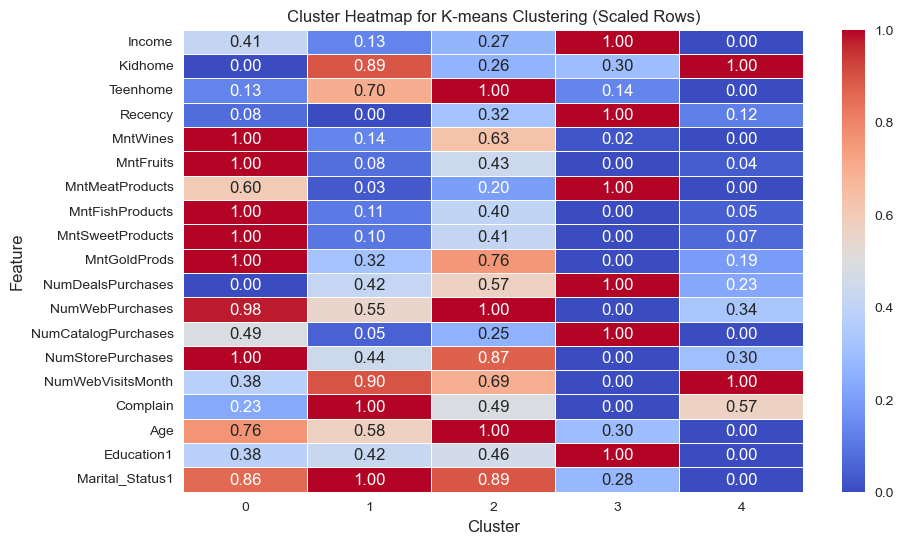

In [164]:
scaler = MinMaxScaler()

# Scale the rows of the dataframe
cluster_centers1_scaled = pd.DataFrame(scaler.fit_transform(cluster_centers1), columns=cluster_centers1.columns)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_centers1_scaled.transpose(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, yticklabels=cluster_centers1.columns)
plt.title('Cluster Heatmap for K-means Clustering (Scaled Rows)')
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.show()

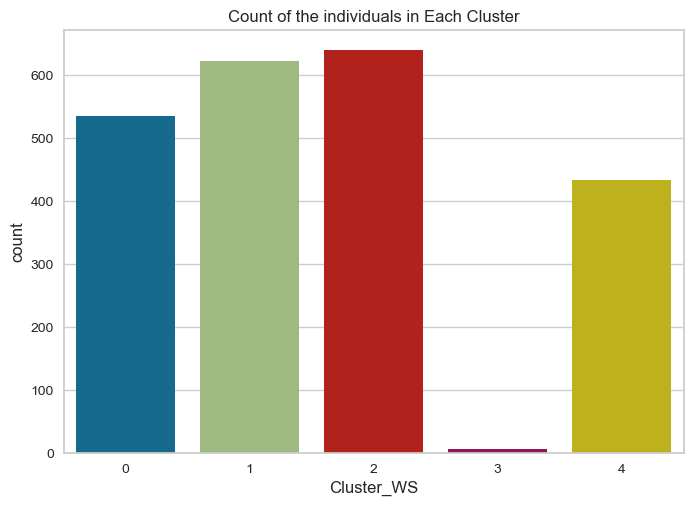

2    640
1    622
0    536
4    434
3      7
Name: Cluster_WS, dtype: int64

In [165]:
sns.countplot(df,x='Cluster_WS')
plt.title('Count of the individuals in Each Cluster')
plt.show()
df['Cluster_WS'].value_counts()

In [166]:
df['sons']=df['Kidhome']+df['Teenhome']
df['total_expense']=df['MntMeatProducts']+df['MntFruits']+df['MntFishProducts']+df['MntWines']+df['MntSweetProducts']

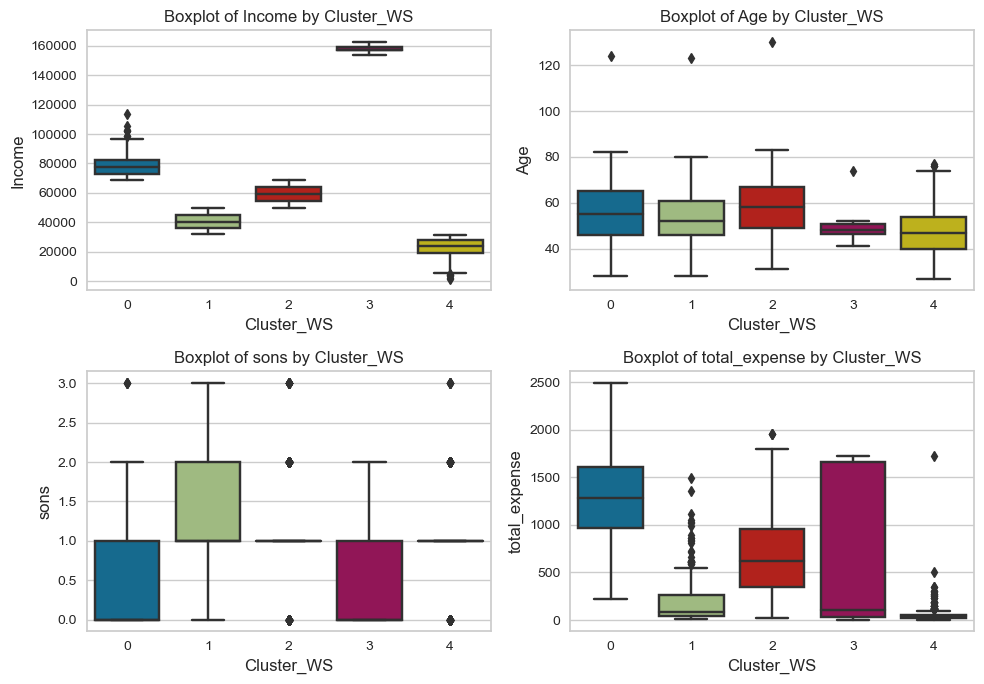

In [167]:
yvar = ['Income', 'Age', 'sons', 'total_expense']

# Create a 2x2 subplot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))

# Flatten the 2D array of subplots for easier iteration
axes = axes.flatten()

# Iterate through variables and create boxplots
for i, o in enumerate(yvar):
    sns.boxplot(x='Cluster_WS', y=o, data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot of {o} by Cluster_WS')

# Adjust layout
plt.tight_layout()
plt.show()

In [168]:
for w in yvar:
    median_per_cluster = df.groupby('Cluster_WS')[w].median()
    print(median_per_cluster)

Cluster_WS
0     77854.0
1     40457.5
2     59241.0
3    157243.0
4     23870.0
Name: Income, dtype: float64
Cluster_WS
0    55.0
1    52.0
2    58.0
3    48.0
4    47.0
Name: Age, dtype: float64
Cluster_WS
0    0.0
1    1.0
2    1.0
3    0.0
4    1.0
Name: sons, dtype: float64
Cluster_WS
0    1281.0
1      89.0
2     622.0
3     105.0
4      39.0
Name: total_expense, dtype: float64


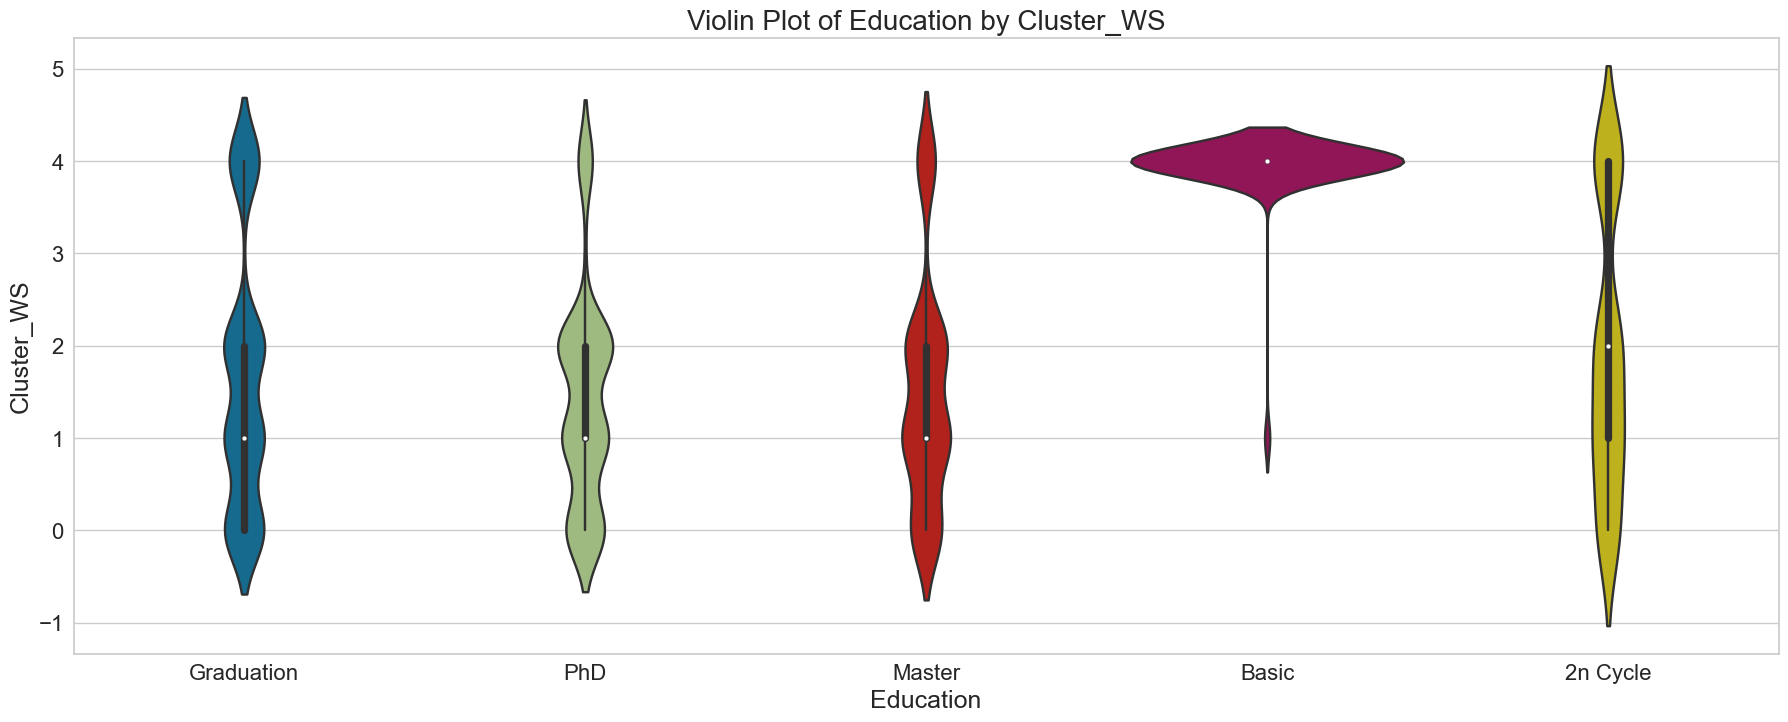

In [169]:
plt.figure(figsize=(22, 8))
ax = sns.violinplot(df, y='Cluster_WS', x='Education')

# Increase the size of y-axis labels
ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)

# Increase the size of x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)

# Set axis labels and title
plt.xlabel('Education', fontsize=18)
plt.ylabel('Cluster_WS', fontsize=18)
plt.title('Violin Plot of Education by Cluster_WS', fontsize=20)

plt.show()

# THANK YOU FOR LISTENING!


-
-
-
-
-
-
-

-
-
-
-

-
--

























-

Legend - Encoded Values:
Graduation: 2
PhD: 4
Master: 3
Basic: 1
2n Cycle: 0

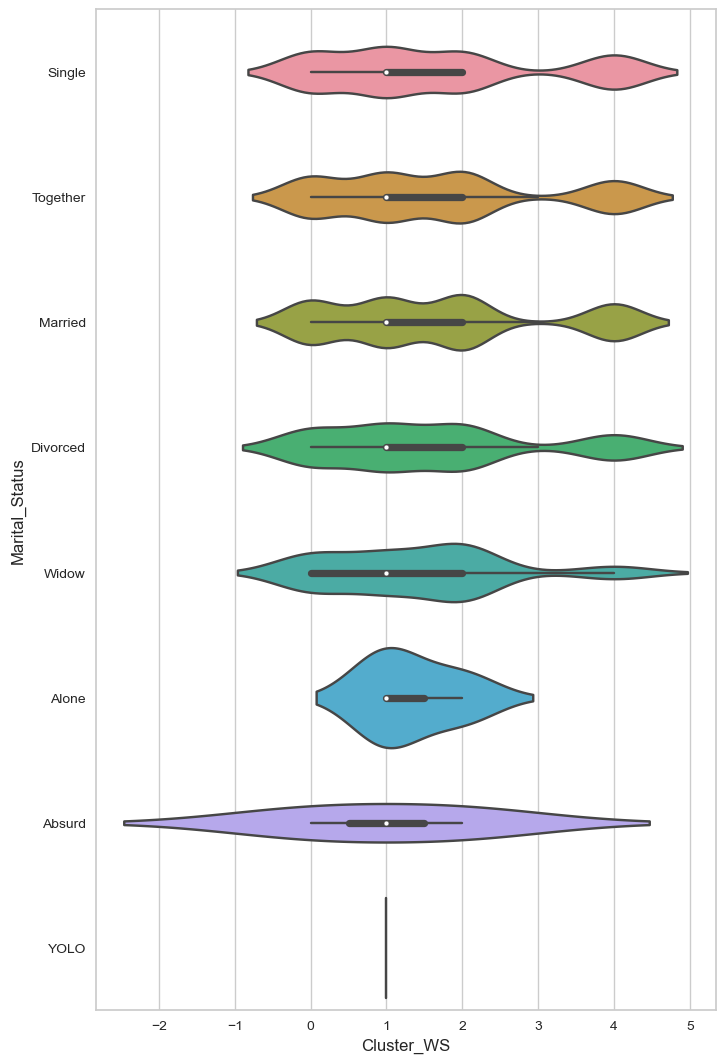

In [170]:
plt.figure(figsize=(8, 13))
sns.violinplot(df,x='Cluster_WS',y='Marital_Status')
plt.show()

Legend - Encoded Values:
Single: 4
Together: 5
Married: 3
Divorced: 2
Widow: 6
Alone: 1
Absurd: 0
YOLO: 7

# Conclusions

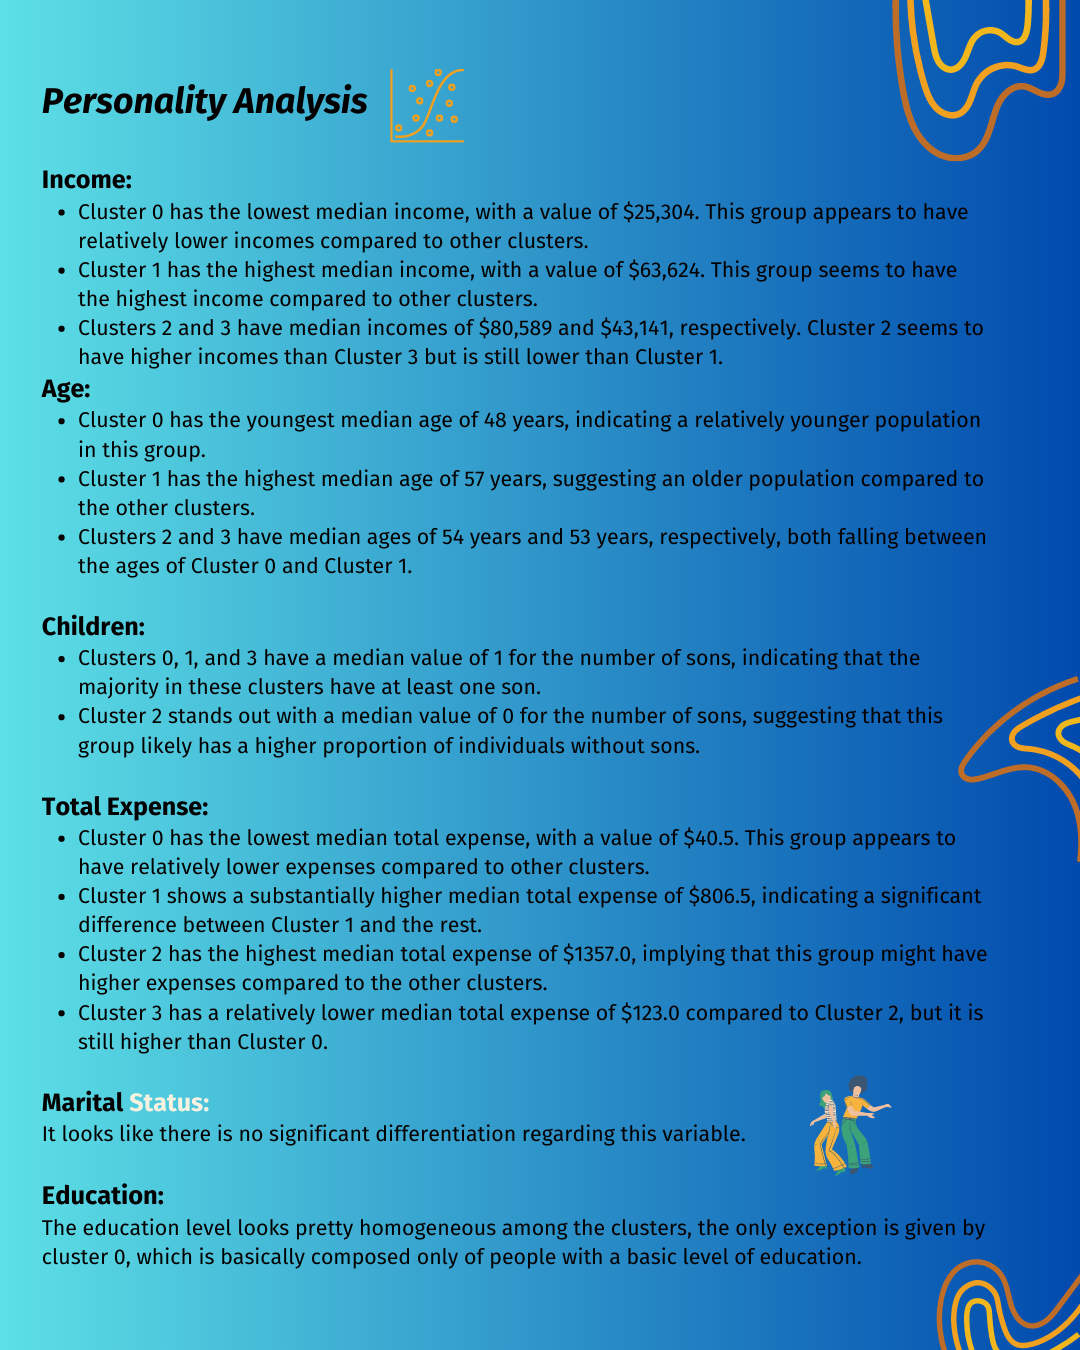